In [1]:
import sklearn as sn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-1.6, 1.6, 17)
x

array([-1.6, -1.4, -1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,
        0.6,  0.8,  1. ,  1.2,  1.4,  1.6])

In [3]:
y = np.cos(x)
y

array([-0.02919952,  0.16996714,  0.36235775,  0.54030231,  0.69670671,
        0.82533561,  0.92106099,  0.98006658,  1.        ,  0.98006658,
        0.92106099,  0.82533561,  0.69670671,  0.54030231,  0.36235775,
        0.16996714, -0.02919952])

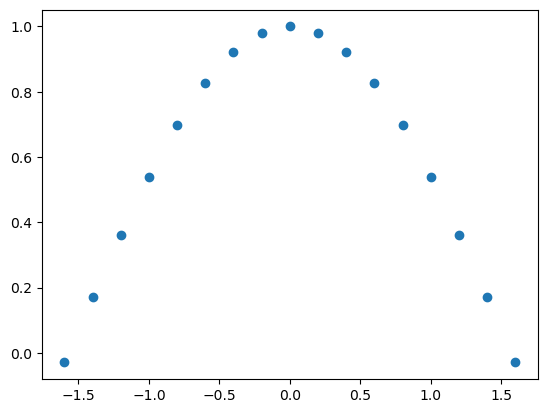

In [4]:
plt.plot(x, y, 'o')
plt.show()

In [5]:
# Fit parabola y = thta0 +theta1 * X + theta2 * X^2
X = np.array([np.ones_like(x), x, x**2]).T
X

array([[ 1.  , -1.6 ,  2.56],
       [ 1.  , -1.4 ,  1.96],
       [ 1.  , -1.2 ,  1.44],
       [ 1.  , -1.  ,  1.  ],
       [ 1.  , -0.8 ,  0.64],
       [ 1.  , -0.6 ,  0.36],
       [ 1.  , -0.4 ,  0.16],
       [ 1.  , -0.2 ,  0.04],
       [ 1.  ,  0.  ,  0.  ],
       [ 1.  ,  0.2 ,  0.04],
       [ 1.  ,  0.4 ,  0.16],
       [ 1.  ,  0.6 ,  0.36],
       [ 1.  ,  0.8 ,  0.64],
       [ 1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.2 ,  1.44],
       [ 1.  ,  1.4 ,  1.96],
       [ 1.  ,  1.6 ,  2.56]])

In [6]:
theta = np.linalg.inv(X.T @ X) @ (X.T @ y)
theta

array([ 9.74068111e-01, -9.13624924e-17, -4.06002619e-01])

In [7]:
theta = np.linalg.solve(X.T @ X, X.T @ y)
theta

array([ 9.74068111e-01, -9.13624924e-17, -4.06002619e-01])

In [8]:
theta, *_ = np.linalg.lstsq(X, y, rcond=None)
theta

array([ 9.74068111e-01, -5.55111512e-17, -4.06002619e-01])

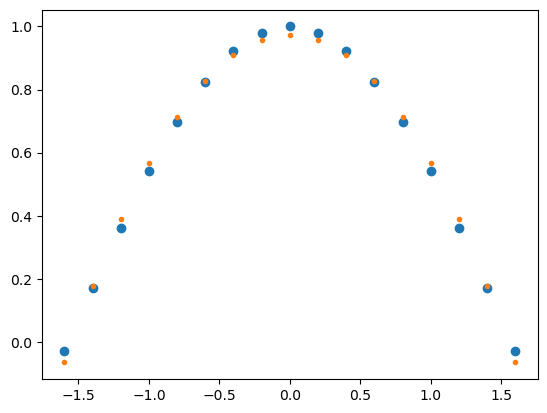

In [9]:
yhat = theta[0] + theta[1] * x +theta[2] * x ** 2
yhat = X @ theta
plt.plot(x, y, 'o')
plt.plot(x, yhat, '.')
plt.show()

In [10]:
error = yhat - y
error

array([-0.03609907,  0.00833584,  0.02706659,  0.02776319,  0.01751973,
        0.00257155, -0.0119533 , -0.02223857, -0.02593189, -0.02223857,
       -0.0119533 ,  0.00257155,  0.01751973,  0.02776319,  0.02706659,
        0.00833584, -0.03609907])

In [11]:
cost = 0.5 / len(y) * error.T @ error
cost

np.float64(0.0002448967193254194)

In [12]:
theta = np.zeros(X.shape[1])
theta

array([0., 0., 0.])

In [13]:
costs = []
alpha =  0.1
for _ in range(300):
    yhat = X @ theta
    error = yhat - y
    theta = theta - alpha / len(y) * X.T @ error
    costs.append(0.5 * len(y) * error.T @ error)
theta

array([ 9.74005907e-01, -2.17949974e-17, -4.05958031e-01])

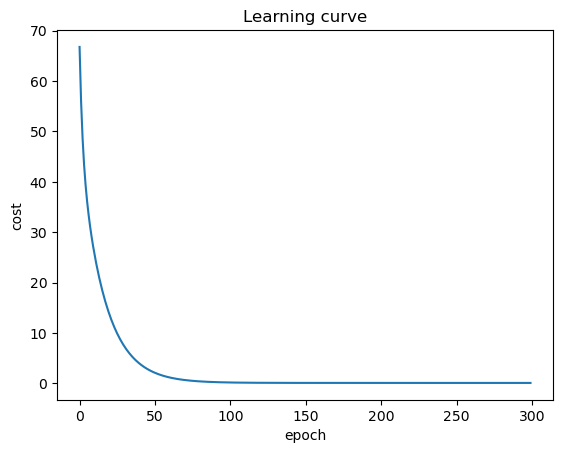

In [14]:
plt.plot(costs)
plt.xlabel("epoch")
plt.ylabel("cost")
plt.title("Learning curve")
plt.show()

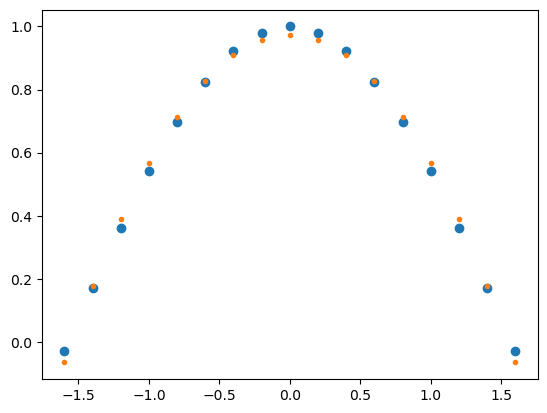

In [15]:
yhat = X @ theta

plt.plot(x, y, 'o')
plt.plot(x, yhat, '.')
plt.show()

In [17]:
x1 = [3, -1, -3]
x2 = [2, 3, 6]
system1 = np.array([x1, x2])
system1

array([[ 3, -1, -3],
       [ 2,  3,  6]])